## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


In [2]:
import pandas as pd

kommuner = ["Malmö", "Stockholm", "Uppsala", "Göteborg"]
population = [347949, 975551, 233839, 583056]
kommuner_series = pd.Series(kommuner)
population_seies = pd.Series(population)

df = pd.DataFrame({"Kommun": kommuner_series, "Population": population_seies})
df

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
# a)
print(df["Kommun"])



0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [4]:
# b)
df[df["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [5]:
# c)

df_sorted = df.sort_values(by = "Population", ascending=False)
df_sorted

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
# d)
df_sorted.iloc[:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [7]:
# e)
population_precentage = [(df["Population"][i]/10379295)*100 for i in range(4)]
new_df = df.assign(Population_percentage= population_precentage)
new_df.sort_values("Population", ascending=False)

,Kommun,Population,Population_percentage
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


# 2. Cities in Sweden

In [8]:
df_raw = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")
df_clean = df_raw[6:].reset_index()
df_clean = df_clean.drop("index", axis=1)
df_clean.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_clean.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074


In [9]:
df_clean.sort_values("Kommun")

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


In [10]:
df_clean["Rang 2019"] = df_clean["Rang 2019"].astype(int)
df_clean["Folkmängd 2019"] = df_clean["Folkmängd 2019"].astype(int)
df_clean

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.34783
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [11]:
# b) klar
# c)
df_clean.sort_values("Folkmängd 2020", ascending=False)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.65167
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


In [12]:
# d)
df_clean.sort_values("Folkmängd 2020")[:5]

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408,-0.872093
194,289,289,Sorsele,2442,2489,-1.888309
29,288,288,Dorotea,2498,2551,-2.077617
5,287,287,Arjeplog,2718,2785,-2.405745
271,286,286,Åsele,2805,2794,0.393701


In [13]:
# e)
df_clean[["Folkmängd 2019", "Folkmängd 2020"]].sum()

Folkmängd 2019    10327589
Folkmängd 2020    10379295
dtype: object

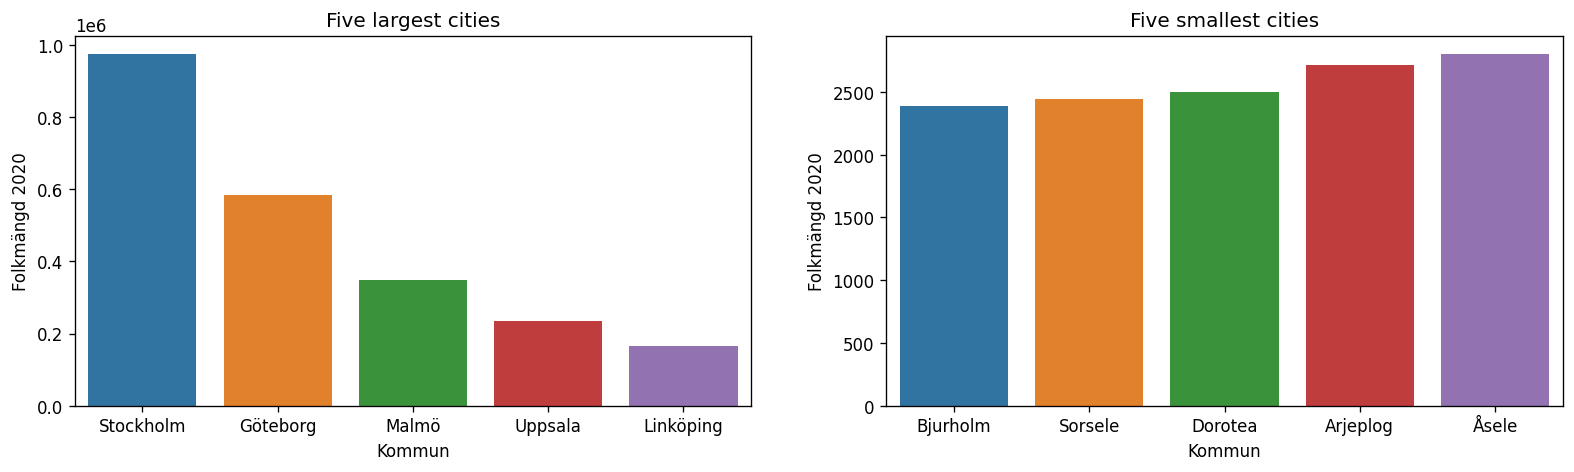

In [14]:
# f)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (16, 4), dpi = 120)
titles = ["Five largest cities", "Five smallest cities"]

largest_cities = df_clean[["Kommun", "Folkmängd 2020"]].sort_values("Folkmängd 2020", ascending=False)[:5]
smallest_cities = df_clean[["Kommun", "Folkmängd 2020"]].sort_values("Folkmängd 2020")[:5]


data_frames = [largest_cities, smallest_cities]

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x = "Kommun", y="Folkmängd 2020", ax=axes[i])
    axes[i].set(title = title)





## 3 Cities in Sweden - gender

In [15]:
from email import header


df_female = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Kvinnor")
df_male = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män")

df_female = df_female[6:].reset_index()
df_female = df_female.drop("index", axis=1)
df_female.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_female["Kön"] = ["Kvinna" for _ in range(290)]

df_male = df_male[6:].reset_index()
df_male = df_male.drop("index", axis=1)
df_male.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_male["Kön"]= ["Man" for _ in range(290)]
df_male

df_all = pd.concat([df_female, df_male])
df_all.set_index("Kommun")
df_all = df_all.drop(["Rang 2020", "Rang 2019"], axis =1)



In [16]:
df_tot = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")

df_tot = df_tot[6:].reset_index()
df_tot = df_tot.drop("index", axis=1)
df_tot.columns = ["Rang 2020", "Rang 2019", "Kommun", "Total pop 2020", "Total pop 2019", "Förändring"]
df_tot = df_tot.drop(["Rang 2020", "Rang 2019"], axis=1)

df_tot_2 = pd.concat([df_tot, df_tot])
df_tot_2.sort_values("Total pop 2020", ascending= False)
df_all = df_all.sort_values("Folkmängd 2020", ascending= False)




In [25]:
df_all = df_all.sort_values("Folkmängd 2020", ascending= False)
df_tot_2 = df_tot_2.sort_values("Total pop 2020", ascending= False)
df_tot_2

,Kommun,Total pop 2020,Total pop 2019,Förändring
198,Stockholm,975551,974073.0,0.151734
198,Stockholm,975551,974073.0,0.151734
57,Göteborg,583056,579281.0,0.65167
57,Göteborg,583056,579281.0,0.65167
134,Malmö,347949,344166.0,1.099179
...,...,...,...,...
29,Dorotea,2498,2551.0,-2.077617
194,Sorsele,2442,2489.0,-1.888309
194,Sorsele,2442,2489.0,-1.888309
12,Bjurholm,2387,2408.0,-0.872093


In [24]:
df_all

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
198,Stockholm,492569,491853.0,0.145572,Kvinna
198,Stockholm,482982,482220.0,0.158019,Man
57,Göteborg,292505,290308.0,0.756782,Man
57,Göteborg,290551,288973.0,0.546072,Kvinna
134,Malmö,175411,173543.0,1.07639,Kvinna
...,...,...,...,...,...
194,Sorsele,1285,1319.0,-2.57771,Man
12,Bjurholm,1233,1249.0,-1.281025,Man
29,Dorotea,1171,1195.0,-2.008368,Kvinna
194,Sorsele,1157,1170.0,-1.111111,Kvinna
